<a href="https://colab.research.google.com/github/Rochit02/ML-lab/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                            recall_score, f1_score, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

In [2]:
print("Loading data...")
FILEPATH = 'hdd_dataset.csv'
try:
    df = pd.read_csv(FILEPATH)
    features = ['capacity_bytes', 'is_legacy_format', 'smart_1_normalized', 'smart_1_raw']
    target = 'failure'

    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(df[features])
    y = df[target].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)

    print("Data loaded successfully!")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

except FileNotFoundError:
    print(f"Error: File '{FILEPATH}' not found")
except Exception as e:
    print(f"Error: {str(e)}")

Loading data...
Data loaded successfully!
X shape: (304957, 4), y shape: (304957,)


In [3]:
def evaluate_performance(model, X_train, y_train, X_test, y_test):
    """Evaluate model performance metrics"""
    def get_metrics(X, y):
        y_pred = model.predict(X)
        return {
            'accuracy': accuracy_score(y, y_pred),
            'precision': precision_score(y, y_pred),
            'recall': recall_score(y, y_pred),
            'f1': f1_score(y, y_pred),
            'confusion_matrix': confusion_matrix(y, y_pred)
        }

    train_metrics = get_metrics(X_train, y_train)
    test_metrics = get_metrics(X_test, y_test)

    print("Training Set:")
    print(f"Accuracy: {train_metrics['accuracy']:.4f}")
    print(f"Precision: {train_metrics['precision']:.4f}")
    print(f"Recall: {train_metrics['recall']:.4f}")
    print(f"F1-Score: {train_metrics['f1']:.4f}")
    print(f"Confusion Matrix:\n{train_metrics['confusion_matrix']}")

    print("Test Set:")
    print(f"Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"Precision: {test_metrics['precision']:.4f}")
    print(f"Recall: {test_metrics['recall']:.4f}")
    print(f"F1-Score: {test_metrics['f1']:.4f}")
    print(f"Confusion Matrix:\n{test_metrics['confusion_matrix']}")

    print("Model Fit Analysis:")
    if train_metrics['accuracy'] > test_metrics['accuracy'] + 0.1:
        print("The model is OVERFITTING (high train accuracy, lower test accuracy)")
    elif train_metrics['accuracy'] < 0.7:
        print("The model may be UNDERFITTING (low performance on both sets)")
    else:
        print("The model has a REGULAR FIT (good balance between train and test performance)")

print("A1: Performance Evaluation:")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
evaluate_performance(knn, X_train, y_train, X_test, y_test)

A1: Performance Evaluation:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Set:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
[[213465      0]
 [     4      0]]
Test Set:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
[[91486     0]
 [    2     0]]
Model Fit Analysis:
The model has a REGULAR FIT (good balance between train and test performance)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
def calculate_regression_metrics(y_true, y_pred):
    """Calculate regression metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R2 Score: {r2:.4f}")

    return {'mse': mse, 'rmse': rmse, 'mape': mape, 'r2': r2}

print("A2: Regression Metrics Example:")
print("Here's an example with synthetic regression data:")
y_true_reg = np.random.rand(100)
y_pred_reg = y_true_reg + np.random.normal(0, 0.1, 100)
calculate_regression_metrics(y_true_reg, y_pred_reg)

A2: Regression Metrics Example:
Here's an example with synthetic regression data:
MSE: 0.0083
RMSE: 0.0908
MAPE: 0.4621
R2 Score: 0.9058


{'mse': 0.008251067799079389,
 'rmse': np.float64(0.09083538847321229),
 'mape': 0.4621244745846134,
 'r2': 0.9058258004700179}

In [5]:
def project_data_analysis(X, y, features):
    """Apply kNN visualization to project data"""
    try:
        print("Starting visualization...")  # Debug print 1

        # Select two features
        feature1, feature2 = features[2], features[3]
        print(f"Selected features: {feature1} and {feature2}")  # Debug print 2

        # Prepare data
        X_project = X[:, [features.index(feature1), features.index(feature2)]]
        print(f"Projected data shape: {X_project.shape}")  # Debug print 3

        # Split data
        X_train_proj, X_test_proj, y_train_proj, y_test_proj = train_test_split(
            X_project, y, test_size=0.3, random_state=42)
        print(f"Train shape: {X_train_proj.shape}, Test shape: {X_test_proj.shape}")  # Debug print 4

        # Scale data
        scaler = StandardScaler()
        X_train_proj = scaler.fit_transform(X_train_proj)
        print("Data scaling completed")  # Debug print 5

        # Train kNN
        knn_proj = KNeighborsClassifier(n_neighbors=3)
        knn_proj.fit(X_train_proj, y_train_proj)
        print("Model trained successfully")  # Debug print 6

        # Create mesh grid
        x_min, x_max = X_project[:, 0].min() - 1, X_project[:, 0].max() + 1
        y_min, y_max = X_project[:, 1].min() - 1, X_project[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                            np.arange(y_min, y_max, 0.1))
        print("Mesh grid created")  # Debug print 7

        # Predict and plot
        Z = knn_proj.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        print("Predictions made")  # Debug print 8

        # Plotting
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
        plt.scatter(X_train_proj[:, 0], X_train_proj[:, 1], c=y_train_proj,
                   cmap=plt.cm.coolwarm, edgecolor='k')
        plt.title(f'Decision Boundary for {feature1} vs {feature2} (k=3)')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        print("Showing plot...")  # Debug print 9
        plt.show()

    except Exception as e:
        print(f"Error occurred: {str(e)}")


# Execute the function with proper checks
if 'X' in globals() and 'y' in globals() and 'features' in globals():
    print("Running visualization...")
    project_data_analysis(X, y, features)
else:
    print("ERROR: Required variables not found!")
    print("Please ensure you've run the data loading cell first.")
    print("Required variables: X, y, features")

A3-A5: Synthetic Data Analysis:


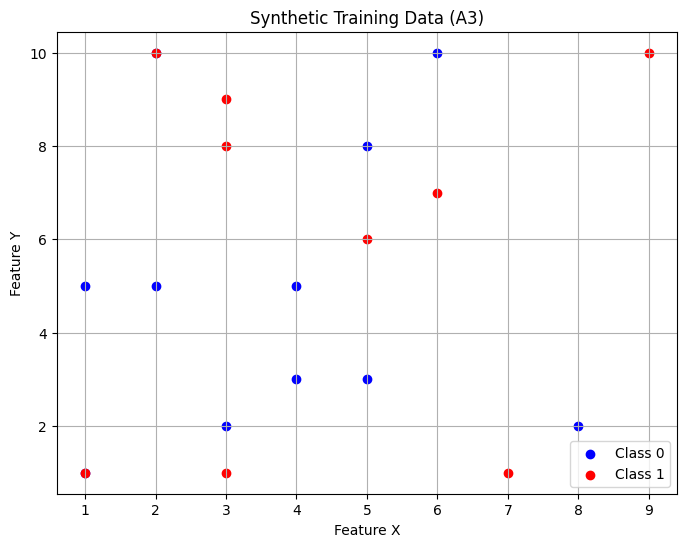

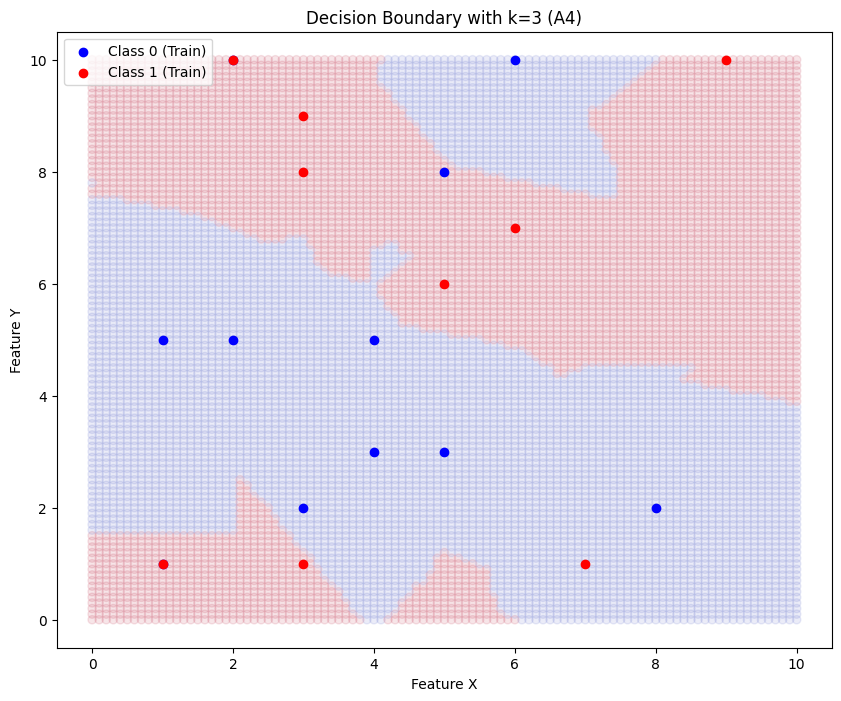

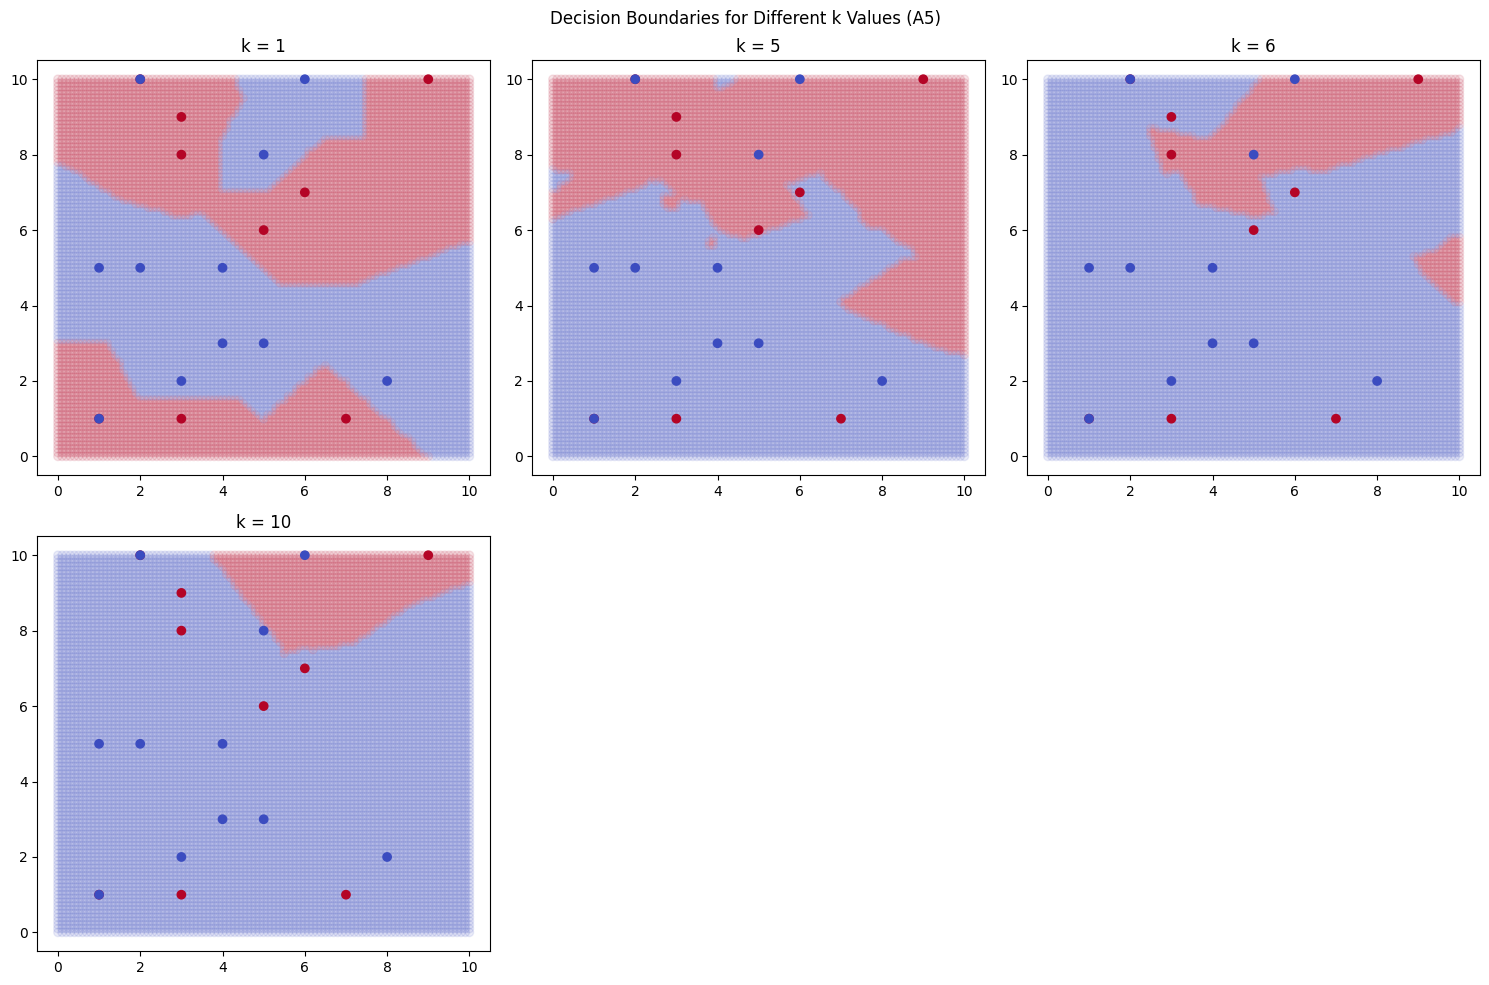

In [6]:
def synthetic_data_analysis():
    """Generate synthetic data and visualize kNN behavior"""
    # A3: Generate synthetic training data
    X_train_synth = np.random.randint(1, 11, size=(20, 2))
    y_train_synth = np.random.randint(0, 2, size=20)

    # Plot training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_synth[y_train_synth == 0, 0], X_train_synth[y_train_synth == 0, 1],
                c='blue', label='Class 0')
    plt.scatter(X_train_synth[y_train_synth == 1, 0], X_train_synth[y_train_synth == 1, 1],
                c='red', label='Class 1')
    plt.title('Synthetic Training Data (A3)')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    plt.grid(True)
    plt.show()

    # A4: Generate test data and classify with k=3
    x_values = np.arange(0, 10.1, 0.1)
    y_values = np.arange(0, 10.1, 0.1)
    xx, yy = np.meshgrid(x_values, y_values)
    X_test_synth = np.c_[xx.ravel(), yy.ravel()]

    knn_synth = KNeighborsClassifier(n_neighbors=3)
    knn_synth.fit(X_train_synth, y_train_synth)
    y_pred_synth = knn_synth.predict(X_test_synth)

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.scatter(X_test_synth[:, 0], X_test_synth[:, 1], c=y_pred_synth,
                alpha=0.1, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_synth[y_train_synth == 0, 0], X_train_synth[y_train_synth == 0, 1],
                c='blue', label='Class 0 (Train)')
    plt.scatter(X_train_synth[y_train_synth == 1, 0], X_train_synth[y_train_synth == 1, 1],
                c='red', label='Class 1 (Train)')
    plt.title('Decision Boundary with k=3 (A4)')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    plt.show()

    # A5: Visualize different k values
    k_values = [1, 5, 6, 10]
    plt.figure(figsize=(15, 10))
    for i, k in enumerate(k_values, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_synth, y_train_synth)
        y_pred = knn.predict(X_test_synth)

        plt.subplot(2, 3, i)
        plt.scatter(X_test_synth[:, 0], X_test_synth[:, 1], c=y_pred,
                    alpha=0.1, cmap=plt.cm.coolwarm)
        plt.scatter(X_train_synth[:, 0], X_train_synth[:, 1], c=y_train_synth,
                    cmap=plt.cm.coolwarm)
        plt.title(f'k = {k}')
    plt.suptitle('Decision Boundaries for Different k Values (A5)')
    plt.tight_layout()
    plt.show()

print("A3-A5: Synthetic Data Analysis:")
synthetic_data_analysis()

In [ ]:
def project_data_analysis(X, y, features):
    try:
        # Select two features
        feature1, feature2 = features[2], features[3]  # smart_1_normalized and smart_1_raw

        # Prepare data
        X_project = X[:, [features.index(feature1), features.index(feature2)]]

        # Split and scale
        X_train_proj, X_test_proj, y_train_proj, y_test_proj = train_test_split(
            X_project, y, test_size=0.3, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_proj)

        # Train model
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train_scaled, y_train_proj)

        # Create grid
        x_min, x_max = X_project[:, 0].min()-1, X_project[:, 0].max()+1
        y_min, y_max = X_project[:, 1].min()-1, X_project[:, 1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        # Predict and plot
        Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
        plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                    c=y_train_proj, cmap=plt.cm.coolwarm, edgecolor='k')
        plt.title(f'Decision Boundary: {feature1} vs {feature2}\n(k=3)')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

    except Exception as e:
        print(f"Error in visualization: {str(e)}")

print("\nA6: Project Data Analysis - Two Features")
if 'X' in globals() and 'y' in globals() and 'features' in globals():
    project_data_analysis(X, y, features)
else:
    print("Error: Please run the data loading cell first!")


A6: Project Data Analysis - Two Features


A7: Hyperparameter Tuning:


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best k: 2
Best cross-validation accuracy: 1.0000


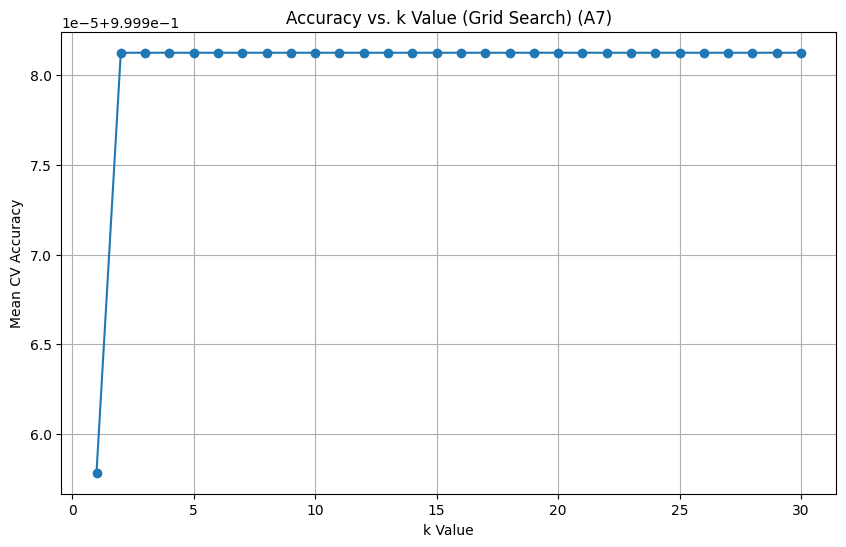

Test accuracy with optimal k: 1.0000


In [7]:
def hyperparameter_tuning(X_train, y_train, X_test, y_test):
    """Find optimal k using GridSearchCV"""
    # Define parameter grid
    param_grid = {'n_neighbors': range(1, 31)}

    # Create GridSearchCV object
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

    # Fit to data
    grid_search.fit(X_train, y_train)

    # Best parameters and score
    print(f"Best k: {grid_search.best_params_['n_neighbors']}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    # Plot results
    results = pd.DataFrame(grid_search.cv_results_)
    plt.figure(figsize=(10, 6))
    plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o')
    plt.title('Accuracy vs. k Value (Grid Search) (A7)')
    plt.xlabel('k Value')
    plt.ylabel('Mean CV Accuracy')
    plt.grid(True)
    plt.show()

    # Evaluate best model on test set
    best_knn = grid_search.best_estimator_
    test_accuracy = best_knn.score(X_test, y_test)
    print(f"Test accuracy with optimal k: {test_accuracy:.4f}")

    return best_knn

print("A7: Hyperparameter Tuning:")
best_model = hyperparameter_tuning(X_train, y_train, X_test, y_test)